In [53]:
#Importing all the packages used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.express as px

In [54]:
#Reading the Raw CSV file 
Happiness = pd.read_csv('Filtered_World_Bank_Values.csv')

In [55]:
#Adding new Percentage HDI change column
Happiness['HDI_change_percent']=((Happiness['2021 HDI']-Happiness['2019 HDI'])/Happiness['2019 HDI'])*100

In [56]:
#Renaming columns and Checking summary variables for continuous variables
Happiness = Happiness.rename(columns={'PM2.5_2017': 'PM2.5'})
Happiness[['Country','Region','Country_Code','2019 HDI','2020 HDI','2021 HDI','PM2.5','Unemployment','Political Stability and absence of violence','GINI','Scientific and Technical journal articles','HDI_change_percent']].describe()

,2019 HDI,2020 HDI,2021 HDI,PM2.5,Unemployment,Political Stability and absence of violence,GINI,Scientific and Technical journal articles,HDI_change_percent
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.742056,0.736119,0.735650,88.656920,7.241626,-0.214856,36.268531,20136.150909,-0.906770
std,0.154562,0.153838,0.155244,26.991464,5.008739,0.917772,10.329368,70780.026846,1.076462
min,0.406000,0.401000,0.400000,0.000000,0.126250,-2.580310,0.000000,0.000000,-5.234899
25%,0.621000,0.614500,0.611000,96.692320,3.903375,-0.752615,31.600000,223.550000,-1.473146
50%,0.768000,0.757000,0.758000,100.000000,5.633500,-0.205340,35.700000,1485.230000,-0.793651
75%,0.869000,0.866500,0.864500,100.000000,9.149708,0.566047,42.000000,12379.925000,-0.214622
max,0.962000,0.959000,0.962000,100.000000,27.114000,1.442325,63.000000,669744.300000,2.639752


In [57]:
#Sanity checks on different rows 
Happiness.loc[25,:]

Country                                                                                              Chile
2019 HDI                                                                                             0.861
2020 HDI                                                                                             0.852
2021 HDI                                                                                             0.855
PM2.5                                                                                            97.663018
Unemployment                                                                                         8.886
Political Stability and absence of violence                                                       0.161352
GINI                                                                                                  44.9
Scientific and Technical journal articles                                                          8979.79
Foreign direct investment, net inflow

In [58]:
#Transforming Data to evaluate top and bottom 5 countries for year 2021
Happiness_2019=Happiness[['Country','2019 HDI']]
Happiness_2019['Year']=2019
Happiness_2019 = Happiness_2019.rename(columns={'2019 HDI': 'HDI'})
Happiness_2019_top_five=Happiness_2019.sort_values(by=('HDI'),ascending=False).head(5).reset_index()
Happiness_2019_tail_five=Happiness_2019.sort_values(by=('HDI'),ascending=False).tail(5).reset_index()

Happiness_2020=Happiness[['Country','2020 HDI']]
Happiness_2020['Year']=2020
Happiness_2020 = Happiness_2020.rename(columns={'2020 HDI': 'HDI'})
Happiness_2020_top_five=Happiness_2020.sort_values(by=('HDI'),ascending=False).head(5).reset_index()
Happiness_2020_tail_five=Happiness_2020.sort_values(by=('HDI'),ascending=False).tail(5).reset_index()

Happiness_2021=Happiness[['Country','2021 HDI']]
Happiness_2021['Year']=2021
Happiness_2021 = Happiness_2021.rename(columns={'2021 HDI': 'HDI'})
Happiness_2021_top_five=Happiness_2021.sort_values(by=('HDI'),ascending=False).head(5).reset_index()
Happiness_2021_tail_five=Happiness_2021.sort_values(by=('HDI'),ascending=False).tail(5).reset_index()

/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_37048/431822904.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_37048/431822904.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_37048/431822904.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

(0.92, 0.97)

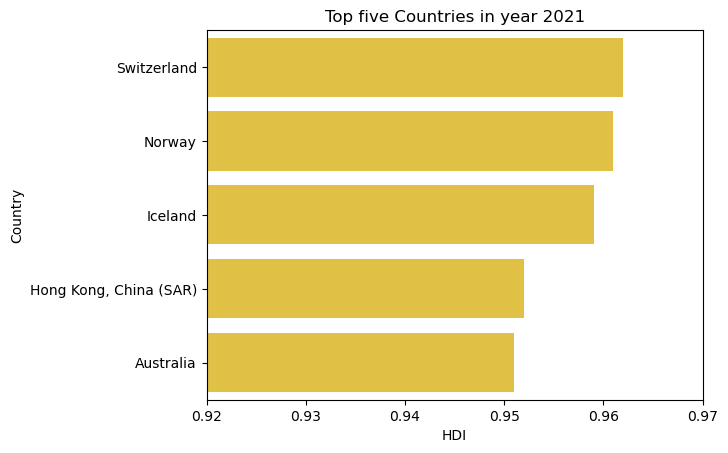

In [59]:
#Top 5 countries 
gfg = sns.barplot(data = Happiness_2021_top_five,
            y = 'Country',
            x = 'HDI',color='#FAD02c')
gfg.set_title('Top five Countries in year 2021')
gfg.set_xlim(0.92, 0.97)

(0.35, 0.45)

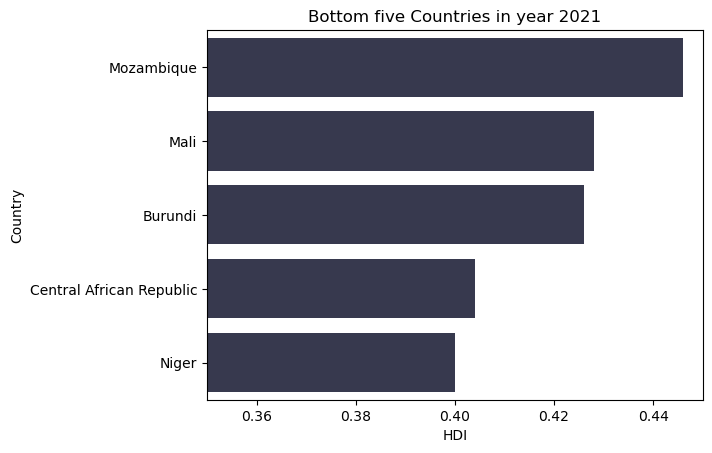

In [60]:
#Bottom 5 countries 
gfg_2= sns.barplot(data = Happiness_2021_tail_five,
            y = 'Country',
            x = 'HDI',color='#333652')
gfg_2.set_title('Bottom five Countries in year 2021')
gfg_2.set_xlim(0.35, 0.45)

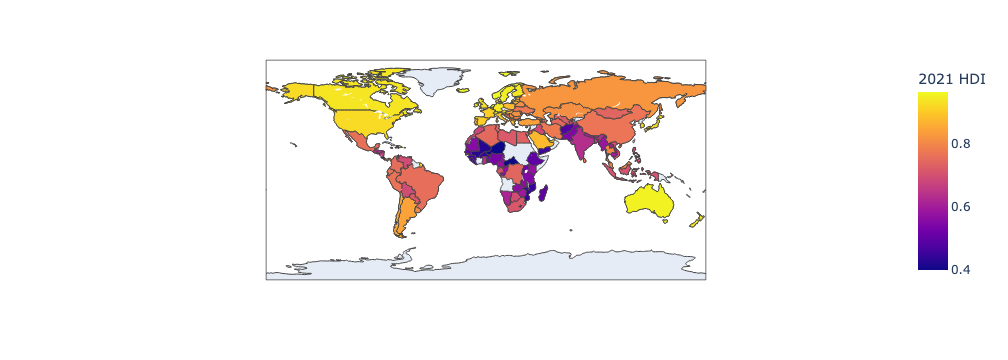

In [61]:
#Checking Data Coverage by plotting 2021 HDI on world map
import plotly.express as px

fig = px.choropleth(Happiness, locations="Country_Code",
                    color="2021 HDI", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [62]:
# Creating a new categorical column for HDI
def classify(value):
    if value >= 0.800:
        return 'Very High'
    elif 0.799 >= value >= 0.700 :
        return 'High'
    elif 0.699 >= value >= 0.550 :
        return 'Medium'
    else:
        return 'Low'
Happiness['2021 HDI Level']=[classify(value) for value in Happiness['2021 HDI']]
Happiness.head()

,Country,2019 HDI,2020 HDI,2021 HDI,PM2.5,Unemployment,Political Stability and absence of violence,GINI,Scientific and Technical journal articles,"Foreign direct investment, net inflows (BoP, current US$, in Billion) (avg)",Happiness Score 2019,HPI 2019,Region,Country_Code,HDI_change_percent,2021 HDI Level
0,Afghanistan,0.488,0.483,0.478,100.000000,11.39750,-2.518530,29.4,119.74,0.018992,3.203,29.4,South Asia,AFG,-2.049180,Low
1,Albania,0.810,0.794,0.796,100.000000,12.25700,0.196294,30.8,167.16,1.232684,4.719,51.0,Europe and Central Asia,ALB,-1.728395,High
2,Algeria,0.748,0.736,0.745,100.000000,11.51000,-0.992440,27.6,5689.02,0.867367,5.211,46.5,Middle East and North Africa,DZA,-0.401070,High
3,Argentina,0.852,0.840,0.842,93.852825,9.13275,0.000468,42.3,9729.75,8.461126,6.086,50.0,Latin America and Caribbean,ARG,-1.173709,Very High
4,Armenia,0.778,0.757,0.759,100.000000,12.41650,-0.804040,25.2,599.38,0.380843,4.559,54.7,Europe and Central Asia,ARM,-2.442159,High


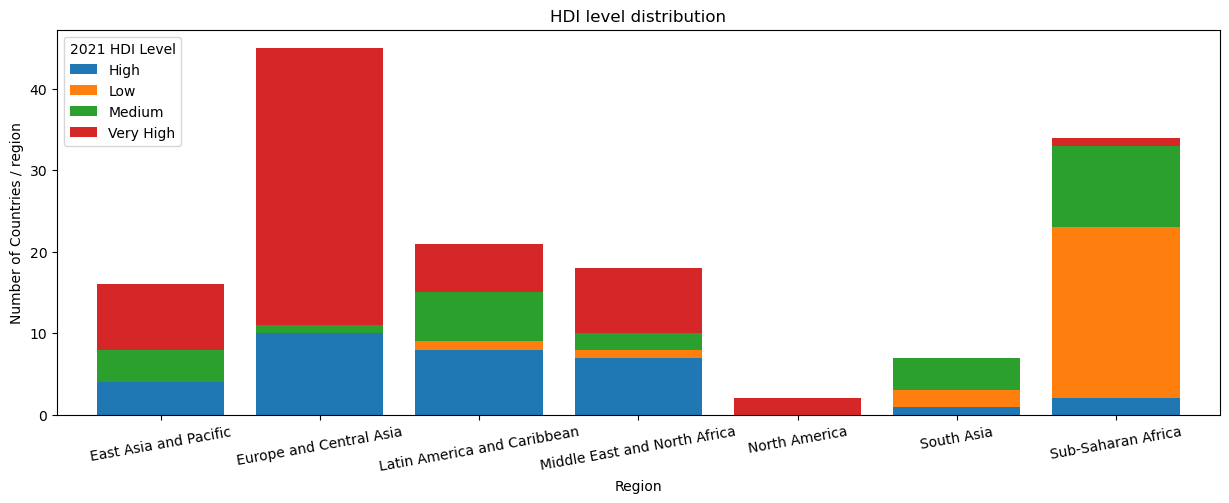

In [63]:
# Distribution of Countries region wise
level=Happiness.groupby(['Region','2021 HDI Level'])['2021 HDI Level'].count().unstack()
level.plot(kind='bar', stacked=True,width=0.8)
plt.xlabel('Region')
plt.xticks(rotation=10)
plt.ylabel('Number of Countries / region')
plt.title('HDI level distribution')
plt.gcf().set_size_inches(15,5)

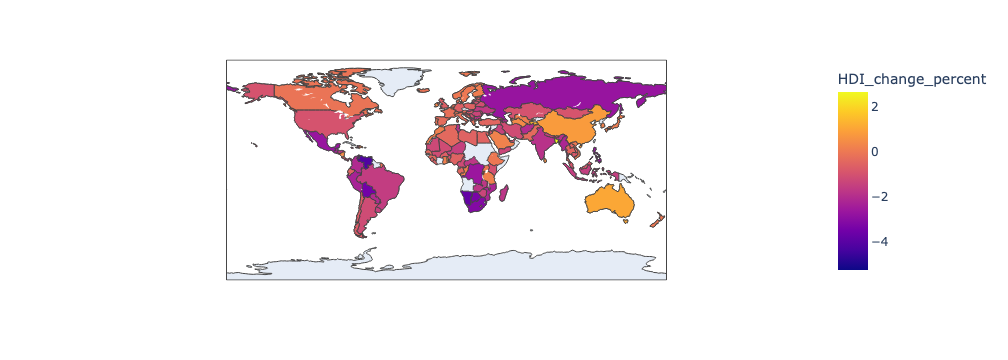

In [64]:
# Percentage change of HDI from 2019 to 2021 on a World Map
import plotly.express as px

fig = px.choropleth(Happiness, locations="Country_Code",
                    color="HDI_change_percent", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_37048/2415457459.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_37048/2415457459.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_37048/2415457459.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

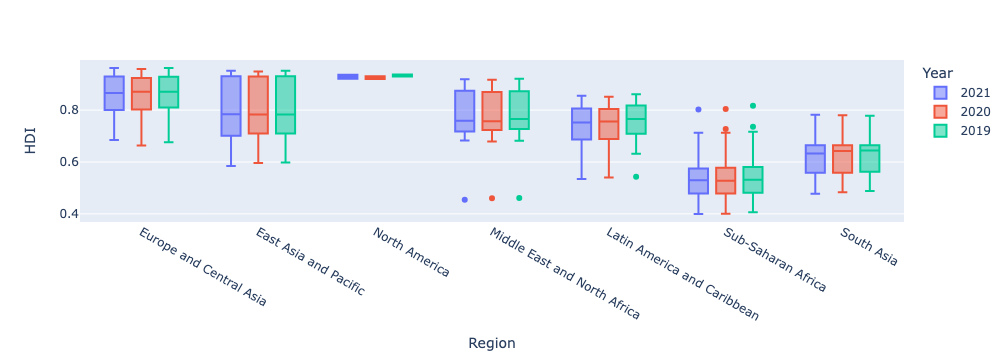

In [65]:
# Checkinh Yearly Change across Regions
Happiness_2019=Happiness[['Region','Country','2019 HDI']]
Happiness_2019['Year']=2019
Happiness_2020=Happiness[['Region','Country','2020 HDI']]
Happiness_2020['Year']=2020
Happiness_2021=Happiness[['Region','Country','2021 HDI']]
Happiness_2021['Year']=2021
Happiness_2019 = Happiness_2019.rename(columns={'2019 HDI': 'HDI'})
Happiness_2020 = Happiness_2020.rename(columns={'2020 HDI': 'HDI'})
Happiness_2021 = Happiness_2021.rename(columns={'2021 HDI': 'HDI'})
Happiness_yearly=pd.concat([Happiness_2019, Happiness_2020])
Happiness_yearly=pd.concat([Happiness_yearly, Happiness_2021])
#Happiness_yearly=Happiness_2019.append(Happiness_2020)
#Happiness_yearly=Happiness_yearly.append(Happiness_2021)
Happiness_yearly['Year']=Happiness_yearly['Year'].astype(int)
Happiness_yearly=Happiness_yearly.sort_values(by=['Year','HDI'],ascending=False).reset_index()
fig=px.box(Happiness_yearly,x='Region',y='HDI',color='Year')
fig.show()

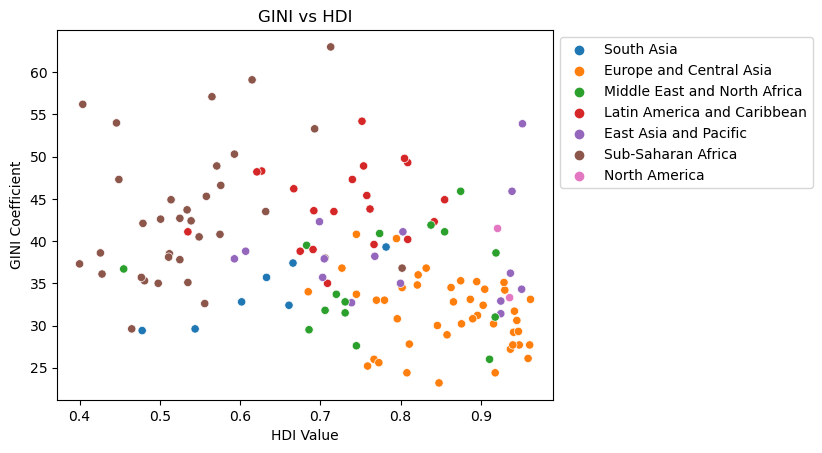

In [66]:
#Scatter plot- GINI vs HDI
Happiness_GINI = Happiness[Happiness['GINI'] != 0]
sns.scatterplot(data = Happiness_GINI, x = '2021 HDI', y = 'GINI', hue = 'Region').set(title='GINI vs HDI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('HDI Value')
plt.ylabel('GINI Coefficient')
plt.show()

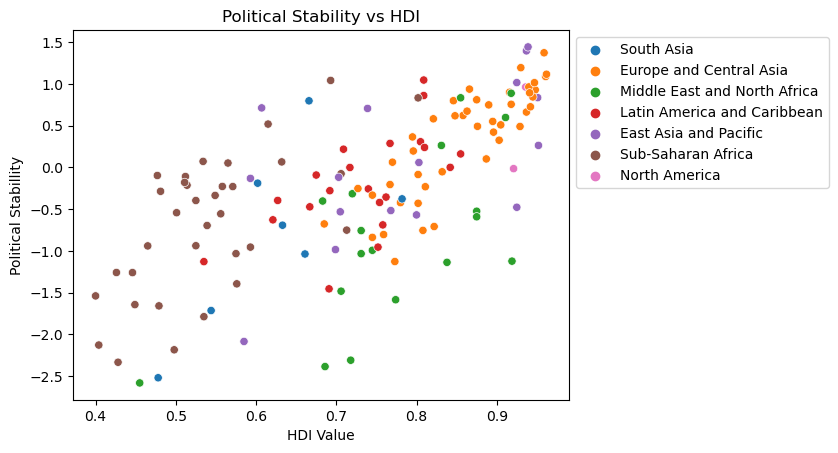

In [67]:
#Scatter plot- Political Stability vs HDI
Happiness_PS = Happiness[Happiness['Political Stability and absence of violence'] != 0]
sns.scatterplot(data = Happiness_PS, x = '2021 HDI', y = 'Political Stability and absence of violence', hue = 'Region').set(title='Political Stability vs HDI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('HDI Value')
plt.ylabel('Political Stabillity')
plt.show()

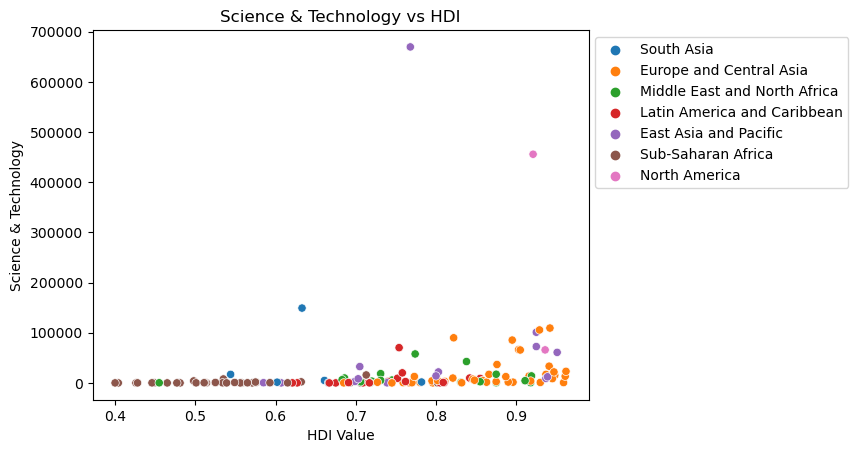

In [68]:
#Scatter plot- Science & Technology vs HDI
Happiness_ST = Happiness[Happiness['Scientific and Technical journal articles'] != 0]
sns.scatterplot(data = Happiness_ST, x = '2021 HDI', y = 'Scientific and Technical journal articles', hue = 'Region').set(title='Science & Technology vs HDI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('HDI Value')
plt.ylabel('Science & Technology')
plt.show()

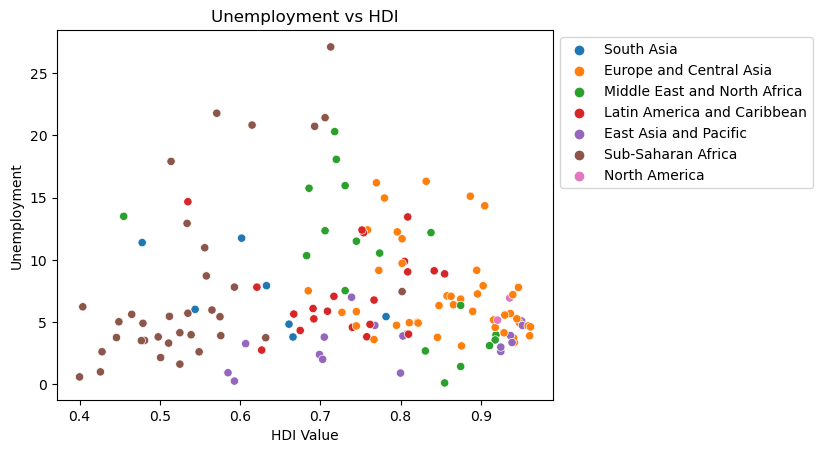

In [69]:
#Scatter plot- Unemployment vs HDI
Happiness_UE = Happiness[Happiness['Unemployment'] != 0]
sns.scatterplot(data = Happiness_UE, x = '2021 HDI', y = 'Unemployment', hue = 'Region').set(title='Unemployment vs HDI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('HDI Value')
plt.ylabel('Unemployment')
plt.show()

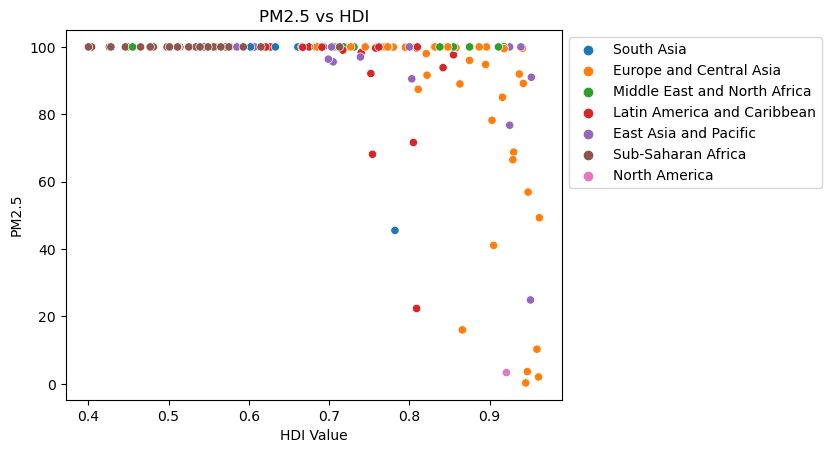

In [70]:
#Scatter plot- PM2.5 vs HDI
Happiness_PM = Happiness[Happiness['PM2.5'] != 0]
sns.scatterplot(data = Happiness_PM, x = '2021 HDI', y = 'PM2.5', hue = 'Region').set(title='PM2.5 vs HDI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('HDI Value')
plt.ylabel('PM2.5')
plt.show()

In [71]:
#preliminary regression analysis
import statsmodels.api as sm

#define response variable
Happiness['log_unemployment']=np.log(Happiness['Unemployment'])
y=Happiness['2019 HDI']

#define predictor variables
x = Happiness[['PM2.5', 'log_unemployment', 'Political Stability and absence of violence',

       'GINI', 'Scientific and Technical journal articles']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_train, x_train).fit()

#view model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:               2021 HDI   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              240.4
Date:                Sat, 02 Dec 2023   Prob (F-statistic):                    2.75e-52
Time:                        19:49:46   Log-Likelihood:                          18.132
No. Observations:                 100   AIC:                                     -26.26
Df Residuals:                      95   BIC:                                     -13.24
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------

Text(0.5, 1.0, 'Test vs Predictions')

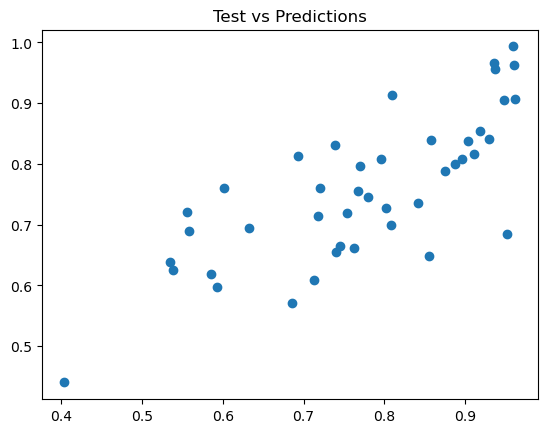

In [72]:
# Training Regression model on 70% of data and evaluating on 30% testing data

Happiness=Happiness.fillna(0)
x = Happiness[['PM2.5', 'log_unemployment', 'Political Stability and absence of violence',

       'GINI', 'Scientific and Technical journal articles']]
y=Happiness['2021 HDI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
coeff=pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
plt.scatter(y_test, predictions)
plt.title('Test vs Predictions')


In [73]:
# checking weights of each feature
coeff

,Coeff
PM2.5,-9.529277e-04
log_unemployment,3.875617e-02
Political Stability and absence of violence,9.891956e-02
GINI,-4.394390e-03
Scientific and Technical journal articles,3.118577e-07


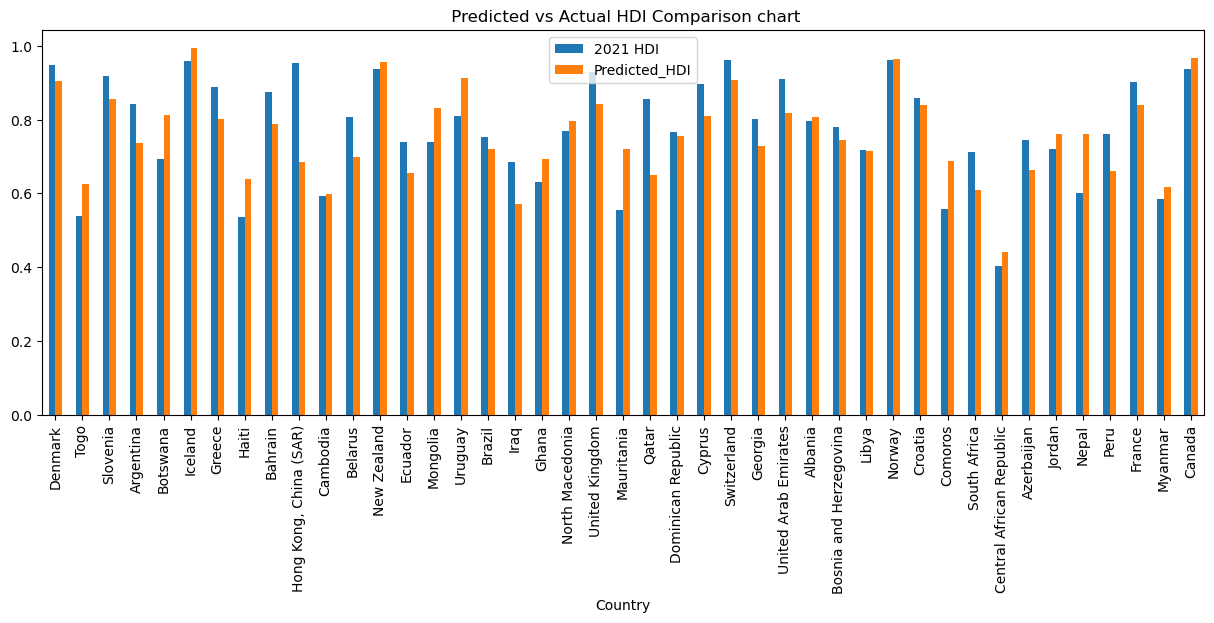

In [74]:
#Plotting country wise actual and predictied HDO fro test data for Visual Evaluation
df_test=pd.DataFrame()
df_test.index=x_test.index
df_test['Flag']=1
df_test=pd.merge(df_test,Happiness,how='left',left_index=True, right_index=True)
df_test['Predicted_HDI']=predictions
df_test.head()
df_test=df_test[['Country','2021 HDI','Predicted_HDI']]
df_test=df_test.set_index('Country')

# Plot grouped horizontal bar chart
df_test.plot.bar(title=" Predicted vs Actual HDI Comparison chart")
plt.gcf().set_size_inches(15,5)

(array([ 3.,  5.,  3.,  9.,  5., 11.,  5.,  0.,  1.,  1.]),
 array([-0.16535952, -0.12209799, -0.07883647, -0.03557494,  0.00768659,
         0.05094811,  0.09420964,  0.13747116,  0.18073269,  0.22399422,
         0.26725574]),
 <BarContainer object of 10 artists>)

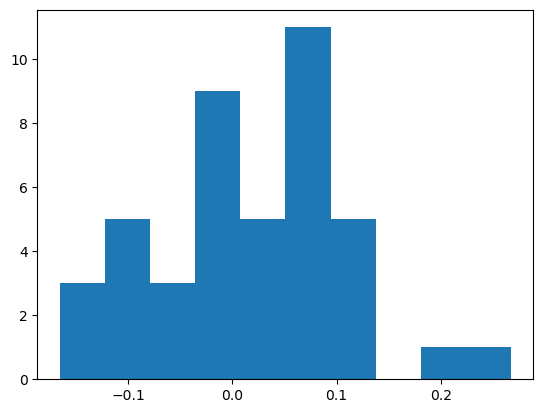

In [75]:
#Checking Residuals for normal Distribution
plt.hist(y_test - predictions)

In [76]:
#RMSE Check
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.0937775148076021